/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


                                                text sentiment     score
0       I love this new AI technology! It's amazing!  positive  0.989521
1  This product is terrible and doesn't work prop...  negative  0.949553
2        The weather is okay today, nothing special.  positive  0.780952
3             This is the best movie I've ever seen!  positive  0.987996
4     I'm frustrated with the poor customer service.  negative  0.930185


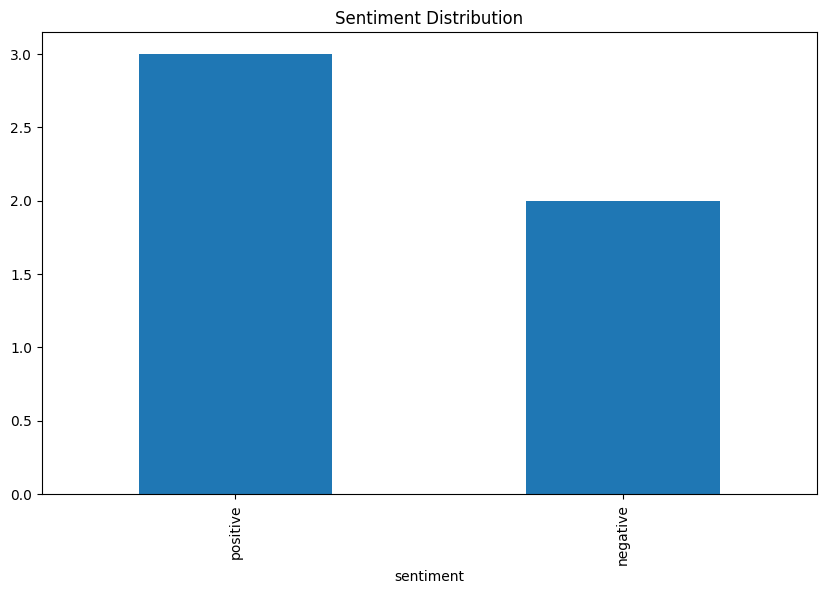

In [1]:
!pip install transformers datasets torch

from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import matplotlib.pyplot as plt

# Load pre-trained sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis",
                             model="cardiffnlp/twitter-roberta-base-sentiment-latest")

# Sample data (you can replace with real tweets or reviews)
texts = [
    "I love this new AI technology! It's amazing!",
    "This product is terrible and doesn't work properly.",
    "The weather is okay today, nothing special.",
    "This is the best movie I've ever seen!",
    "I'm frustrated with the poor customer service."
]

# Analyze sentiment
results = sentiment_pipeline(texts)

# Create results DataFrame
df_sentiment = pd.DataFrame({
    'text': texts,
    'sentiment': [result['label'] for result in results],
    'score': [result['score'] for result in results]
})

print(df_sentiment)

# Visualization
sentiment_counts = df_sentiment['sentiment'].value_counts()
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.show()